In [24]:
import numpy as np
import networkx as nx
import scipy
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [56]:
n = 100
pts = np.array([np.random.uniform([-20, -20, 0], [20, 20, 5]) for _ in range(n)]) # Generate Nodes

pos = {i: pts[i] for i in range(n)}
G = nx.random_geometric_graph(n, radius=7, pos=pos, dim=3)

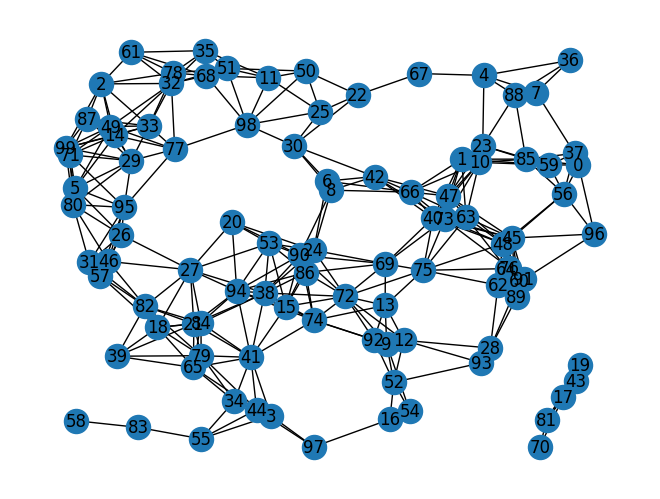

In [57]:
nx.draw(G, pos=[v[:2] for k, v in pos.items()], with_labels=True)
plt.show()

In [58]:
for u, v in G.edges:  # Add edges to graph    
    distance = np.linalg.norm(G.nodes[v]['pos'] - G.nodes[u]['pos'])
    G.edges[u, v]['distance'] = distance

In [59]:
elevations = [G.nodes[i]['pos'][2] for i in G.nodes]  # Get all the elevations
treatment_idxs = np.argsort(elevations)[:5]  # Get the indices of the 5 lowest elevation nodes

for i in G.nodes:  # Add treatment attribute to Graph
    if i in treatment_idxs:
        G.nodes[i]['treatment'] = 1
    else:
        G.nodes[i]['treatment'] = 0

# Store treatment and source nodes for use later
treatment_nodes = [i for i in G.nodes if G.nodes[i]['treatment'] == 1]  # use i
source_nodes = [j for j in G.nodes if G.nodes[j]['treatment'] == 0]  # use j

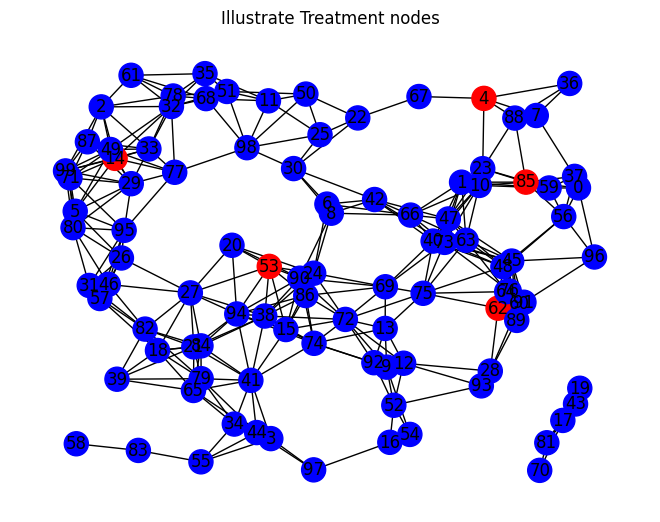

In [60]:
node_colors = ['red' if G.nodes[node]['treatment'] == 1 else 'blue' for node in G.nodes]
nx.draw(G, node_color=node_colors, with_labels=True, pos=[G.nodes[node]['pos'][:2] for node in G.nodes])
plt.title("Illustrate Treatment nodes")
plt.show()

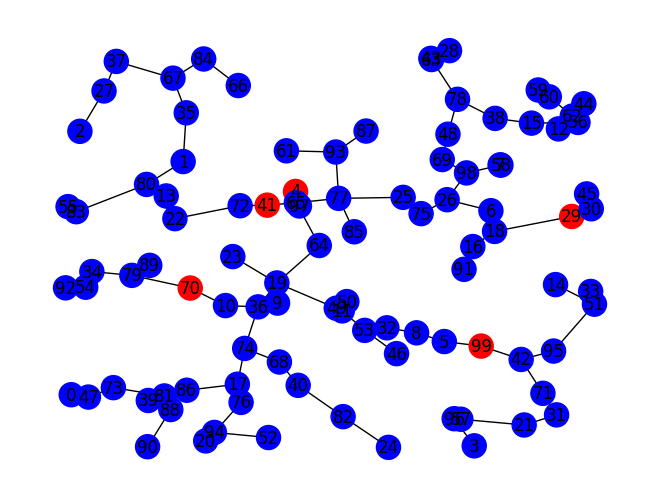

In [55]:
mst = nx.minimum_spanning_tree(G, weight='distance')
nx.draw(mst, node_color=node_colors, with_labels=True, pos=[G.nodes[node]['pos'][:2] for node in G.nodes])